# IBM Data Science Capstone Project - Data Clustering in Seattle Neighborhoods #

<b>Picking a suitable location for a new restaurant in Seattle.</b>

### Introduction ###

Seattle is a seaport city on the West Coast of the United States. It is the seat of King County, Washington. With a 2019 population of 753,675, it is the largest city in both the state of Washington and the Pacific Northwest region of North America. The Seattle metropolitan area's population is 3.98 million, making it the 15th-largest in the United States. It is most diversified as a lot of people from different countries live there. It's over 41 million visitors have been travelled to Seattle from all over the world in 2019. Therefore, it offers many business opportunities for people who wants to operate their own business. Comprehensive consideration of analysis for the business expansion is so much important as it is directly proportional to the cost of the business. The analysis from this report help people strategically pick the suitable location to open a new restaurant.

#### Business Problem

The objective of this capstone project is to analyse and select the best location in Seattle to open a new Chinese restaurant. Using data science methodology and machine learing techniques like clustering. The assumption behind the analysis is that we can use unsupervised machine learning to create clusters of districts that will provide us a list of areas for consideration for the restaurant. This capstone project aims to provide solutions to answer the business question: if a business man is looking for a location to open a new Chinese restaurant, where would you recommend that they open it?

#### Target Audience

The target audience of this project include people who are insterested in opening a new Chinese restaurant or any other typies of restaurant in Seattle.

### Data

To tackle the above mentioned question, we need to have the dataset that contains

1. List of the neighborhoods of Seattle -> this comes from a csv list
2. Geo-coordinates of the neighborhoods in Seattle -> this is obtained via geocoder
3. Top venues of neighborhoods -> Foursquare API is used to collect the venue data

#### Source

The wikipedia page https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle is the major source that is being used to obtain all the neighborhoods of Seattle. We then use beautifulsoup4 package, a Python module that helps to scrape information from the web pages to extract all the tables from this wikipedia page and convert it into a pandas dataframe. Then we use Python’s geopy package to obtain the latitude and longitude of all the neighborhoods present in the dataframe.

In [3]:
!pip install scikit-learn==0.24.2

!pip install -U numpy

!pip install -U pandas

!pip install -U scipy

!pip install -U imbalanced-learn


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 22.3 MB 18.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/

In [4]:
!pip install beautifulsoup4
!pip install lxml
!pip install html5lib
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

## 1.Putting the Data together
### Scraping the Wikipedia page for neighborhoods of Seattle.

In [5]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of neighborhoods in Seattle - Wikipedia</title>


,Neighborhood name,Within larger district,Annexed[41],Locator map,Street map,Image,Notes
1,North Seattle,Seattle,Various,,,,North of the Lake Washington Ship Canal[42]
2,Broadview,North Seattle[42],1954[43],,,,[44]
3,Bitter Lake,North Seattle[42],1954[43],,,,[45]
4,North Beach / Blue Ridge,North Seattle[42],"1940,[43] 1954[43]",,"<img alt=""Seattle North Beach - Blue Ridge map.jpg"" data-file-height=""924"" data-file-width=""1221"" decoding=""async"" height=""76"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Seattle_North_Beach_-_Blue_Ridge_map.jpg/100px-Seattle_North_Beach_-_Blue_Ridge_map.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Seattle_North_Beach_-_Blue_Ridge_map.jpg/150px-Seattle_North_Beach_-_Blue_Ridge_map.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Seattle_North_Beach_-_Blue_Ridge_map.jpg/200px-Seattle_North_Beach_-_Blue_Ridge_map.jpg 2x"" width=""100""/>",,[46]
5,Crown Hill,North Seattle[42],"1907,[47] 1952,[43] 1954[43]",,,"<img alt=""Seattle - Holman Road, 1959.jpg"" data-file-height=""990"" data-file-width=""1457"" decoding=""async"" height=""102"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Seattle_-_Holman_Road%2C_1959.jpg/150px-Seattle_-_Holman_Road%2C_1959.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Seattle_-_Holman_Road%2C_1959.jpg/225px-Seattle_-_Holman_Road%2C_1959.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Seattle_-_Holman_Road%2C_1959.jpg/300px-Seattle_-_Holman_Road%2C_1959.jpg 2x"" width=""150""/>",[48]
6,Greenwood,North Seattle[42],"1891,[43] 1954[43]",,,,[49]
7,Northgate,North Seattle[42],various 1891-1954[43],,,"<img alt=""Seattle - Northgate branch library 01.jpg"" data-file-height=""2848"" data-file-width=""4288"" decoding=""async"" height=""100"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Seattle_-_Northgate_branch_library_01.jpg/150px-Seattle_-_Northgate_branch_library_01.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Seattle_-_Northgate_branch_library_01.jpg/225px-Seattle_-_Northgate_branch_library_01.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Seattle_-_Northgate_branch_library_01.jpg/300px-Seattle_-_Northgate_branch_library_01.jpg 2x"" width=""150""/>",[50]
8,Haller Lake,Northgate[50],1954[43],,,"<img alt=""North Seattle Household Hazardous Waste Collection Facility 01.jpg"" data-file-height=""2848"" data-file-width=""4288"" decoding=""async"" height=""100"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/8/87/North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg/150px-North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/8/87/North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg/225px-North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/87/North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg/300px-North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg 2x"" width=""150""/>",[51]
9,Pinehurst,Northgate[50],1953[43],,,"<img alt=""Seattle - Jackson Park Golf Course, 1970.jpg"" data-file-height=""953"" data-file-width=""1200"" decoding=""async"" height=""119"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg/150px-Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg/225px-Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg/300px-Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg 2x"" width=""150""/>",[52]
10,North College Park (Licton Springs),Northgate[50],"1950, 1954[43]","<img alt=""Seattle Map - Licton Springs.png"" data-file-height=""698"" data-file-width=""394"" decoding=""async"" height

The html table is converted to Pandas DataFrame for cleaning and preprocessing.

In [6]:
dfs = pd.read_html(tab)
df = dfs[0]
df.head()

,Unnamed: 0,Neighborhood name,Within larger district,Annexed[41],Locator map,Street map,Image,Notes
0,1,North Seattle,Seattle,Various,NaN,NaN,NaN,North of the Lake Washington Ship Canal[42]
1,2,Broadview,North Seattle[42],1954[43],NaN,NaN,NaN,[44]
2,3,Bitter Lake,North Seattle[42],1954[43],NaN,NaN,NaN,[45]
3,4,North Beach / Blue Ridge,North Seattle[42],"1940,[43] 1954[43]",NaN,NaN,NaN,[46]
4,5,Crown Hill,North Seattle[42],"1907,[47] 1952,[43] 1954[43]",NaN,NaN,NaN,[48]


In [7]:
df1 = df.drop(columns=['Unnamed: 0', 'Annexed[41]', 'Locator map', 'Street map', 'Image', 'Notes'])
df1

,Neighborhood name,Within larger district
0,North Seattle,Seattle
1,Broadview,North Seattle[42]
2,Bitter Lake,North Seattle[42]
3,North Beach / Blue Ridge,North Seattle[42]
4,Crown Hill,North Seattle[42]
...,...,...
122,Riverview,Delridge[164]
123,Highland Park,Delridge[165]
124,South Delridge,Delridge[166]
125,Roxhill,Delridge[167]


In [8]:
df1.rename(columns={"Neighborhood name": "Neighborhoods", "Within larger district": "District"}, inplace=True)
df1

,Neighborhoods,District
0,North Seattle,Seattle
1,Broadview,North Seattle[42]
2,Bitter Lake,North Seattle[42]
3,North Beach / Blue Ridge,North Seattle[42]
4,Crown Hill,North Seattle[42]
...,...,...
122,Riverview,Delridge[164]
123,Highland Park,Delridge[165]
124,South Delridge,Delridge[166]
125,Roxhill,Delridge[167]


In [28]:
# define the dataframe columns
column_names = ['District','Neighborhoods', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbors = pd.DataFrame(columns=column_names)

neighbors

,District,Neighborhoods,Latitude,Longitude


In [29]:
district = df1['Neighborhoods']
name = df1['District']
location = None
latitude = None
longitude = None

for data in range(0, len(district)):
    dt = district[data]
    nm = name[data]
    
    geolocator = Nominatim(user_agent="nicolec5320@gmail.com")
    location = geolocator.geocode('{}'.format(dt))
    latitude = location.latitude
    longitude = location.longitude

    neighbors = neighbors.append({ 'Neighborhoods':dt,'District':nm,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)

AttributeError: 'NoneType' object has no attribute 'latitude'

In [30]:
neighbors

,District,Neighborhoods,Latitude,Longitude
0,Seattle,North Seattle,47.590055,-122.291455
1,North Seattle[42],Broadview,41.863920,-87.853393
2,North Seattle[42],Bitter Lake,47.726236,-122.348764
3,North Seattle[42],North Beach / Blue Ridge,33.709860,-117.764738
4,North Seattle[42],Crown Hill,47.694715,-122.371459
...,...,...,...,...
75,Downtown[107],Central Waterfront,39.935527,-75.128271
76,Downtown,West Edge[118][119],47.606340,-122.337632
77,Central Seattle,"Central Area[120] / Central District (""CD"")",41.726591,44.745855
78,Central Area[120],Mann,54.193680,-4.559115


In [31]:
print('The dataframe has {} district and {} neighborhoods.'.format(
        len(neighbors['District'].unique()),
       neighbors.shape[0]
    )
)

The dataframe has 24 district and 80 neighborhoods.


## Use geopy library to get the latitude and longitude values of Seattle.

In [32]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

47.6038321 -122.3300624


#### Create a map of Seattle with neighborhoods superimposed on top

In [33]:
# create map of New York using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district, neighborhoods in zip(neighbors['Latitude'], neighbors['Longitude'], neighbors['District'], neighbors['Neighborhoods']):
    label = '{}, {}'.format(neighborhoods, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

## 2.Exploring the Districts
#### Define Foursquare Credentials and Version

In [34]:
CLIENT_ID = '5E1TZFJIXAB5GMJ3DTAGJF10DMIC0P4VNWE53MIWN1YB2GCG' # your Foursquare ID
CLIENT_SECRET = '0JQEUJUKQT5B2NMAZLVAVSFD5D3XWEVCAGZPU1244FIDBEBL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5E1TZFJIXAB5GMJ3DTAGJF10DMIC0P4VNWE53MIWN1YB2GCG
CLIENT_SECRET:0JQEUJUKQT5B2NMAZLVAVSFD5D3XWEVCAGZPU1244FIDBEBL


### Let's explore the first neighborhood in our dataframe.

In [36]:
seattle_data = neighbors[neighbors['District'] == 'North Seattle[42]'].reset_index(drop=True)
seattle_data.head()

,District,Neighborhoods,Latitude,Longitude
0,North Seattle[42],Broadview,41.863920,-87.853393
1,North Seattle[42],Bitter Lake,47.726236,-122.348764
2,North Seattle[42],North Beach / Blue Ridge,33.709860,-117.764738
3,North Seattle[42],Crown Hill,47.694715,-122.371459
4,North Seattle[42],Greenwood,37.870954,-96.247134


### Let's explore the first neighborhood in our dataframe.

In [39]:
seattle_data.loc[0, 'District']

'North Seattle[42]'

In [40]:
neighborhood_latitude = seattle_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = seattle_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = seattle_data.loc[0, 'Neighborhoods'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Broadview are 41.8639201, -87.8533931.


Getting the top 100 venues that are in North Seattle within a radius of 1000 meters. This will be obtained from Foursquare.

In [41]:
search_query = 'venues'
radius = 1000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=5E1TZFJIXAB5GMJ3DTAGJF10DMIC0P4VNWE53MIWN1YB2GCG&client_secret=0JQEUJUKQT5B2NMAZLVAVSFD5D3XWEVCAGZPU1244FIDBEBL&v=20180605&ll=41.8639201,-87.8533931&radius=1000&limit=100'

Getting the json of venues

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60c94632cc8f6873892156d4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Broadview',
  'headerFullLocation': 'Broadview',
  'headerLocationGranularity': 'city',
  'totalResults': 31,
  'suggestedBounds': {'ne': {'lat': 41.87292010900001,
    'lng': -87.84133076662509},
   'sw': {'lat': 41.85492009099999, 'lng': -87.86545543337492}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c6c7c023fbf76b0c4b43e1c',
       'name': 'Redbox',
       'location': {'address': '1600 W Roosevelt Rd',
        'lat': 41.86409,
        'lng': -87.851789,
        'labeledLatLngs': [{'label': 'display',
          'lat': 41.86409,
          'lng': -87.851789}],
   

Defining a function to get categories

In [44]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [45]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Redbox,Video Store,41.864090,-87.851789
1,Baskin-Robbins,Ice Cream Shop,41.863680,-87.856330
2,U-Haul Moving & Storage of Broadview,Storage Facility,41.864203,-87.857033
3,Submarine Brothers,Hot Dog Joint,41.864589,-87.842771
4,Pete's II Redhots,Hot Dog Joint,41.864316,-87.851424


And how many venues were returned by Foursquare?

In [46]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

31 venues were returned by Foursquare.


In [47]:
nearby_venues

,name,categories,lat,lng
0,Redbox,Video Store,41.864090,-87.851789
1,Baskin-Robbins,Ice Cream Shop,41.863680,-87.856330
2,U-Haul Moving & Storage of Broadview,Storage Facility,41.864203,-87.857033
3,Submarine Brothers,Hot Dog Joint,41.864589,-87.842771
4,Pete's II Redhots,Hot Dog Joint,41.864316,-87.851424
5,JJ Fish & Chicken,Wings Joint,41.864460,-87.844032
6,Walgreens,Pharmacy,41.863777,-87.852074
7,Popeyes Louisiana Kitchen,Fried Chicken Joint,41.864449,-87.845474
8,Uncle Remus Saucy Fried Chicken,Fried Chicken Joint,41.864140,-87.854355
9,Marquee Restaurant,Diner,41.864093,-87.862196


### Now let's explore the other districts as well

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
seattle_venues = getNearbyVenues(names=neighbors['District'],
                                   latitudes=neighbors['Latitude'],
                                   longitudes=neighbors['Longitude']
                                  )

Seattle
North Seattle[42]
North Seattle[42]
North Seattle[42]
North Seattle[42]
North Seattle[42]
North Seattle[42]
Northgate[50]
Northgate[50]
Northgate[50]
Northgate[50]
North Seattle[42]
Lake City[55]
Lake City[55]
Lake City[55]
Lake City[55]
Lake City[55]
North Seattle[42]
North Seattle[42]
North Seattle[42]
North Seattle[42]
North Seattle[42]
North Seattle[42]
North Seattle[42]
Windermere[42] / North Seattle
North Seattle[42]
North Seattle[42]
Ravenna[42] / University District
North Seattle[42]
Lake Union / Lower Wallingford, spilling over into Fremont and the University District.
North Seattle[42]
North Seattle[42]
North Seattle[42]
North Seattle[42]
Ballard[78]
Ballard[78]
Ballard[78]
Ballard[78]
Ballard[78]
Seattle
Central Seattle[42]
Magnolia[84]
Magnolia[84]
Magnolia[84]
Central Seattle[42]
Central Seattle[42]
Queen Anne[89]
Queen Anne[89]
Queen Anne[89]
Queen Anne[89]
Central Seattle[42]
Capitol Hill[94]
Capitol Hill[94]
Capitol Hill / Broadway[94]
Capitol Hill[94] / Central

In [51]:
print(seattle_venues.shape)
seattle_venues.head()

(3670, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Seattle,47.590055,-122.291455,QED Coffee,47.589677,-122.292358,Coffee Shop
1,Seattle,47.590055,-122.291455,Colman Park,47.586151,-122.287638,Park
2,Seattle,47.590055,-122.291455,Heyday,47.590477,-122.292367,New American Restaurant
3,Seattle,47.590055,-122.291455,That's Amore Italian Cafe,47.589577,-122.292576,Italian Restaurant
4,Seattle,47.590055,-122.291455,Amy Yee Tennis Center,47.584255,-122.297900,Gym / Fitness Center


Now, checking how many venues were collected for other districts as well.

In [53]:
seattle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ballard[78],117,117,117,117,117,117
Capitol Hill / Broadway[94],3,3,3,3,3,3
Capitol Hill / Stevens[94],99,99,99,99,99,99
Capitol Hill / Stevens[94] / Central Seattle,82,82,82,82,82,82
Capitol Hill[94],66,66,66,66,66,66
Capitol Hill[94] / Central Seattle,86,86,86,86,86,86
Central Area[120],4,4,4,4,4,4
Central Seattle,135,135,135,135,135,135
Central Seattle[42],270,270,270,270,270,270


### Checking how many district venue categories we have

In [54]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 346 uniques categories.


## 3.Analyzing the Districts
For that, we use one hot encoding.

In [55]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Zoo Exhibit,ATM,Advertising Agency,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,...,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
seattle_onehot.shape

(3670, 346)

Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [57]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped

,Neighborhood,Zoo Exhibit,ATM,Advertising Agency,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,...,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Ballard[78],0.000000,0.000000,0.000000,0.000000,0.000000,0.017094,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.008547,0.000000,0.000000,0.008547,0.000000
1,Capitol Hill / Broadway[94],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Capitol Hill / Stevens[94],0.000000,0.000000,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010101
3,Capitol Hill / Stevens[94] / Central Seattle,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.012195,0.000000,0.000000,0.012195,0.000000,0.000000
4,Capitol Hill[94],0.000000,0.015152,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Capitol Hill[94] / Central Seattle,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,...,0.000000,0.011628,0.00,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000
6,Central Area[120],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Central Seattle,0.000000,0.000000,0.000000,0.000000,0.000000,0.029630,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.007407,0.000000,0.000000,0.000000,0.007407,0.000000
8,Central Seattle[42],0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.003704,...,0.000000,0.000000,0.00,0.003704,0.014815,0.003704,0.000000,0.000000,0.000000,0.000000
9,Downtown,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.01,0.000000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000


### Let's see each neighborhood along with the top 5 most common venues

In [58]:
num_top_venues = 5

for hood in seattle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ballard[78]----
                venue  freq
0                Park  0.05
1         Pizza Place  0.05
2          Food Truck  0.05
3         Coffee Shop  0.04
4  Mexican Restaurant  0.03


----Capitol Hill / Broadway[94]----
                  venue  freq
0                  Park  0.33
1           Golf Course  0.33
2            Playground  0.33
3          Outlet Store  0.00
4  Outdoor Supply Store  0.00


----Capitol Hill / Stevens[94]----
              venue  freq
0             Hotel  0.20
1  Swiss Restaurant  0.06
2            Hostel  0.06
3        Restaurant  0.06
4       Supermarket  0.05


----Capitol Hill / Stevens[94] / Central Seattle----
               venue  freq
0           Bus Stop  0.09
1        Coffee Shop  0.09
2               Café  0.05
3  French Restaurant  0.04
4                Bar  0.04


----Capitol Hill[94]----
            venue  freq
0            Park  0.08
1  Sandwich Place  0.06
2     Coffee Shop  0.06
3     Pizza Place  0.06
4        Bus Stop  0.05


----Capitol

Putting it into a dataframe

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ballard[78],Park,Pizza Place,Food Truck,Coffee Shop,Deli / Bodega,Mexican Restaurant,Soccer Field,Shipping Store,Bar,Beach
1,Capitol Hill / Broadway[94],Park,Golf Course,Playground,Outlet Store,Outdoor Supply Store,Outdoor Sculpture,Other Repair Shop,Other Nightlife,Organic Grocery,Optical Shop
2,Capitol Hill / Stevens[94],Hotel,Swiss Restaurant,Hostel,Restaurant,Supermarket,Italian Restaurant,Indian Restaurant,Chocolate Shop,Bar,Train Station
3,Capitol Hill / Stevens[94] / Central Seattle,Bus Stop,Coffee Shop,Café,French Restaurant,Bar,Italian Restaurant,Taco Place,Food Truck,Sushi Restaurant,Grocery Store
4,Capitol Hill[94],Park,Sandwich Place,Coffee Shop,Pizza Place,Bus Stop,Deli / Bodega,Italian Restaurant,Mexican Restaurant,Pub,Café


## Using Machine Learning for Clustering Neighborhoods
For clustering, K-means method will be applied. To be able to select the optimal number of clusters, the silhouette score will be used.
First, let's find out the optimal number of clusters. For that, we will create a graph of the silhouette scores.

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [63]:
max_range = 8

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = seattle_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

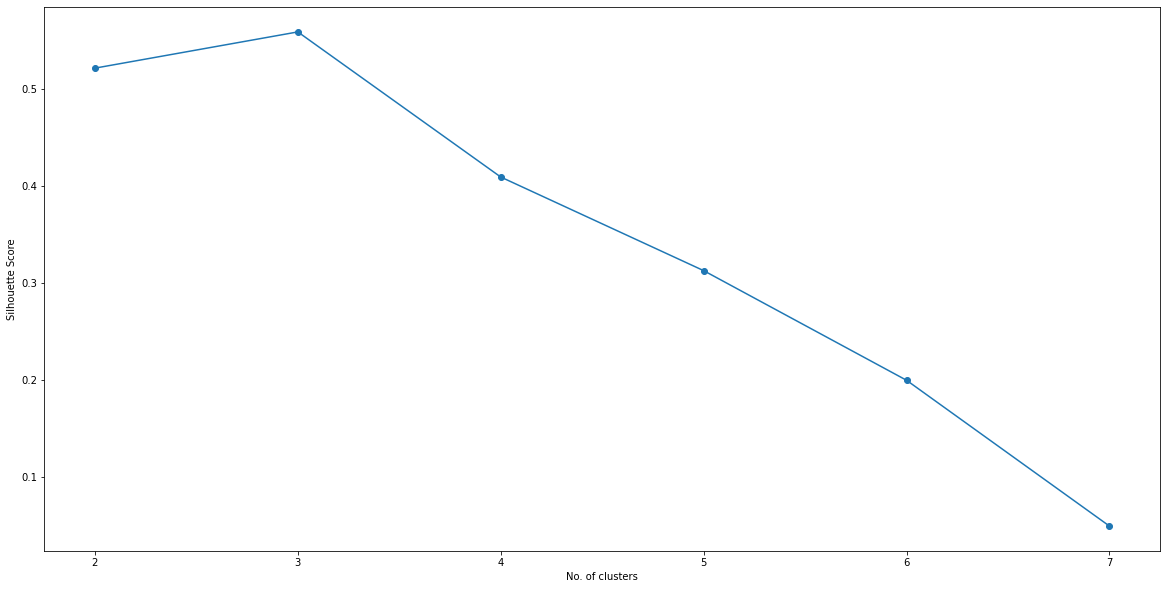

In [64]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

Based on this graph, we can see that the optimal number of clusters is 3.
Now let's run the K-means clustering with the optimal number of clusters, which is 3.

In [73]:
# run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [74]:
neighbors.rename(columns={'District':'Neighborhood', 'Neighborhoods':'Name'}, inplace=True)
neighbors.head()

,Neighborhood,Name,Latitude,Longitude
0,Seattle,North Seattle,47.590055,-122.291455
1,North Seattle[42],Broadview,41.863920,-87.853393
2,North Seattle[42],Bitter Lake,47.726236,-122.348764
3,North Seattle[42],North Beach / Blue Ridge,33.709860,-117.764738
4,North Seattle[42],Crown Hill,47.694715,-122.371459


In [78]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = neighbors

# merge budapest_grouped with budapest_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged

,Neighborhood,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Seattle,North Seattle,47.590055,-122.291455,0,Coffee Shop,Park,Ethiopian Restaurant,Grocery Store,Bar,Café,Gym / Fitness Center,Thai Restaurant,Gym,Italian Restaurant
1,North Seattle[42],Broadview,41.863920,-87.853393,0,Coffee Shop,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant,Grocery Store,Zoo Exhibit,Fast Food Restaurant,Pub,Bakery
2,North Seattle[42],Bitter Lake,47.726236,-122.348764,0,Coffee Shop,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant,Grocery Store,Zoo Exhibit,Fast Food Restaurant,Pub,Bakery
3,North Seattle[42],North Beach / Blue Ridge,33.709860,-117.764738,0,Coffee Shop,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant,Grocery Store,Zoo Exhibit,Fast Food Restaurant,Pub,Bakery
4,North Seattle[42],Crown Hill,47.694715,-122.371459,0,Coffee Shop,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant,Grocery Store,Zoo Exhibit,Fast Food Restaurant,Pub,Bakery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Downtown[107],Central Waterfront,39.935527,-75.128271,0,Coffee Shop,Hotel,Café,Sandwich Place,Vietnamese Restaurant,Pizza Place,Japanese Restaurant,Bakery,Bar,Chinese Restaurant
76,Downtown,West Edge[118][119],47.606340,-122.337632,0,Coffee Shop,Hotel,Bakery,Seafood Restaurant,French Restaurant,American Restaurant,Cocktail Bar,Plaza,Sushi Restaurant,Breakfast Spot
77,Central Seattle,"Central Area[120] / Central District (""CD"")",41.726591,44.745855,0,Coffee Shop,Bar,Sushi Restaurant,Café,American Restaurant,Italian Restaurant,Bakery,Restaurant,French Restaurant,Sandwich Place
78,Central Area[120],Mann,54.193680,-4.559115,1,Convenience Store,Trail,Forest,Ski Area,Optical Shop,Padangnese Restaurant,Outlet Store,Outdoor Supply Store,Outdoor Sculpture,Other Repair Shop


In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 1

In [80]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Seattle,Coffee Shop,Park,Ethiopian Restaurant,Grocery Store,Bar,Café,Gym / Fitness Center,Thai Restaurant,Gym,Italian Restaurant
1,North Seattle[42],Coffee Shop,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant,Grocery Store,Zoo Exhibit,Fast Food Restaurant,Pub,Bakery
2,North Seattle[42],Coffee Shop,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant,Grocery Store,Zoo Exhibit,Fast Food Restaurant,Pub,Bakery
3,North Seattle[42],Coffee Shop,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant,Grocery Store,Zoo Exhibit,Fast Food Restaurant,Pub,Bakery
4,North Seattle[42],Coffee Shop,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant,Grocery Store,Zoo Exhibit,Fast Food Restaurant,Pub,Bakery
...,...,...,...,...,...,...,...,...,...,...,...
73,Downtown[107],Coffee Shop,Hotel,Café,Sandwich Place,Vietnamese Restaurant,Pizza Place,Japanese Restaurant,Bakery,Bar,Chinese Restaurant
74,Downtown[107],Coffee Shop,Hotel,Café,Sandwich Place,Vietnamese Restaurant,Pizza Place,Japanese Restaurant,Bakery,Bar,Chinese Restaurant
75,Downtown[107],Coffee Shop,Hotel,Café,Sandwich Place,Vietnamese Restaurant,Pizza Place,Japanese Restaurant,Bakery,Bar,Chinese Restaurant
76,Downtown,Coffee Shop,Hotel,Bakery,Seafood Restaurant,French Restaurant,American Restaurant,Cocktail Bar,Plaza,Sushi Restaurant,Breakfast Spot


### Cluster 2

In [81]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
78,Central Area[120],Convenience Store,Trail,Forest,Ski Area,Optical Shop,Padangnese Restaurant,Outlet Store,Outdoor Supply Store,Outdoor Sculpture,Other Repair Shop
79,Central Area[120],Convenience Store,Trail,Forest,Ski Area,Optical Shop,Padangnese Restaurant,Outlet Store,Outdoor Supply Store,Outdoor Sculpture,Other Repair Shop


### Cluster 3

In [82]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[0] + list(range(5, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Capitol Hill / Broadway[94],Park,Golf Course,Playground,Outlet Store,Outdoor Supply Store,Outdoor Sculpture,Other Repair Shop,Other Nightlife,Organic Grocery,Optical Shop


## 4.Conclusion

### Understanding the Clusters

By looking at the cluster data, we can see that cluster 1 is the one that we are the most interested in.
Cluster 2 is districts where convenience store rated at top, but behind that trail, forest, shi area are also present. They are mainly outdoor sport place, but not really the vibrant, lively part of the city.
Cluster 3 contain only one district. Here we can see park at the top, but behind that golf course, playgrounds are also present. These are mainly areas with family houses where people live.
Cluster 1 is the biggest cluster, but this is where we see lot's of gastronomy related venues (coffee shop, pizza place, sushi restaurant, Ethiopian restaurant, Chinese reataurant, Mexican restaurant, etc..).
Based on that, we can advise the restaurant owner to consider the districts from this cluster as the potential location for the new restaurant.